In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import normalize, StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [2]:
airline = pd.read_csv(r'EastWestAirlines.csv')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline2= airline.drop('ID#',axis=1)
airline2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
airline2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


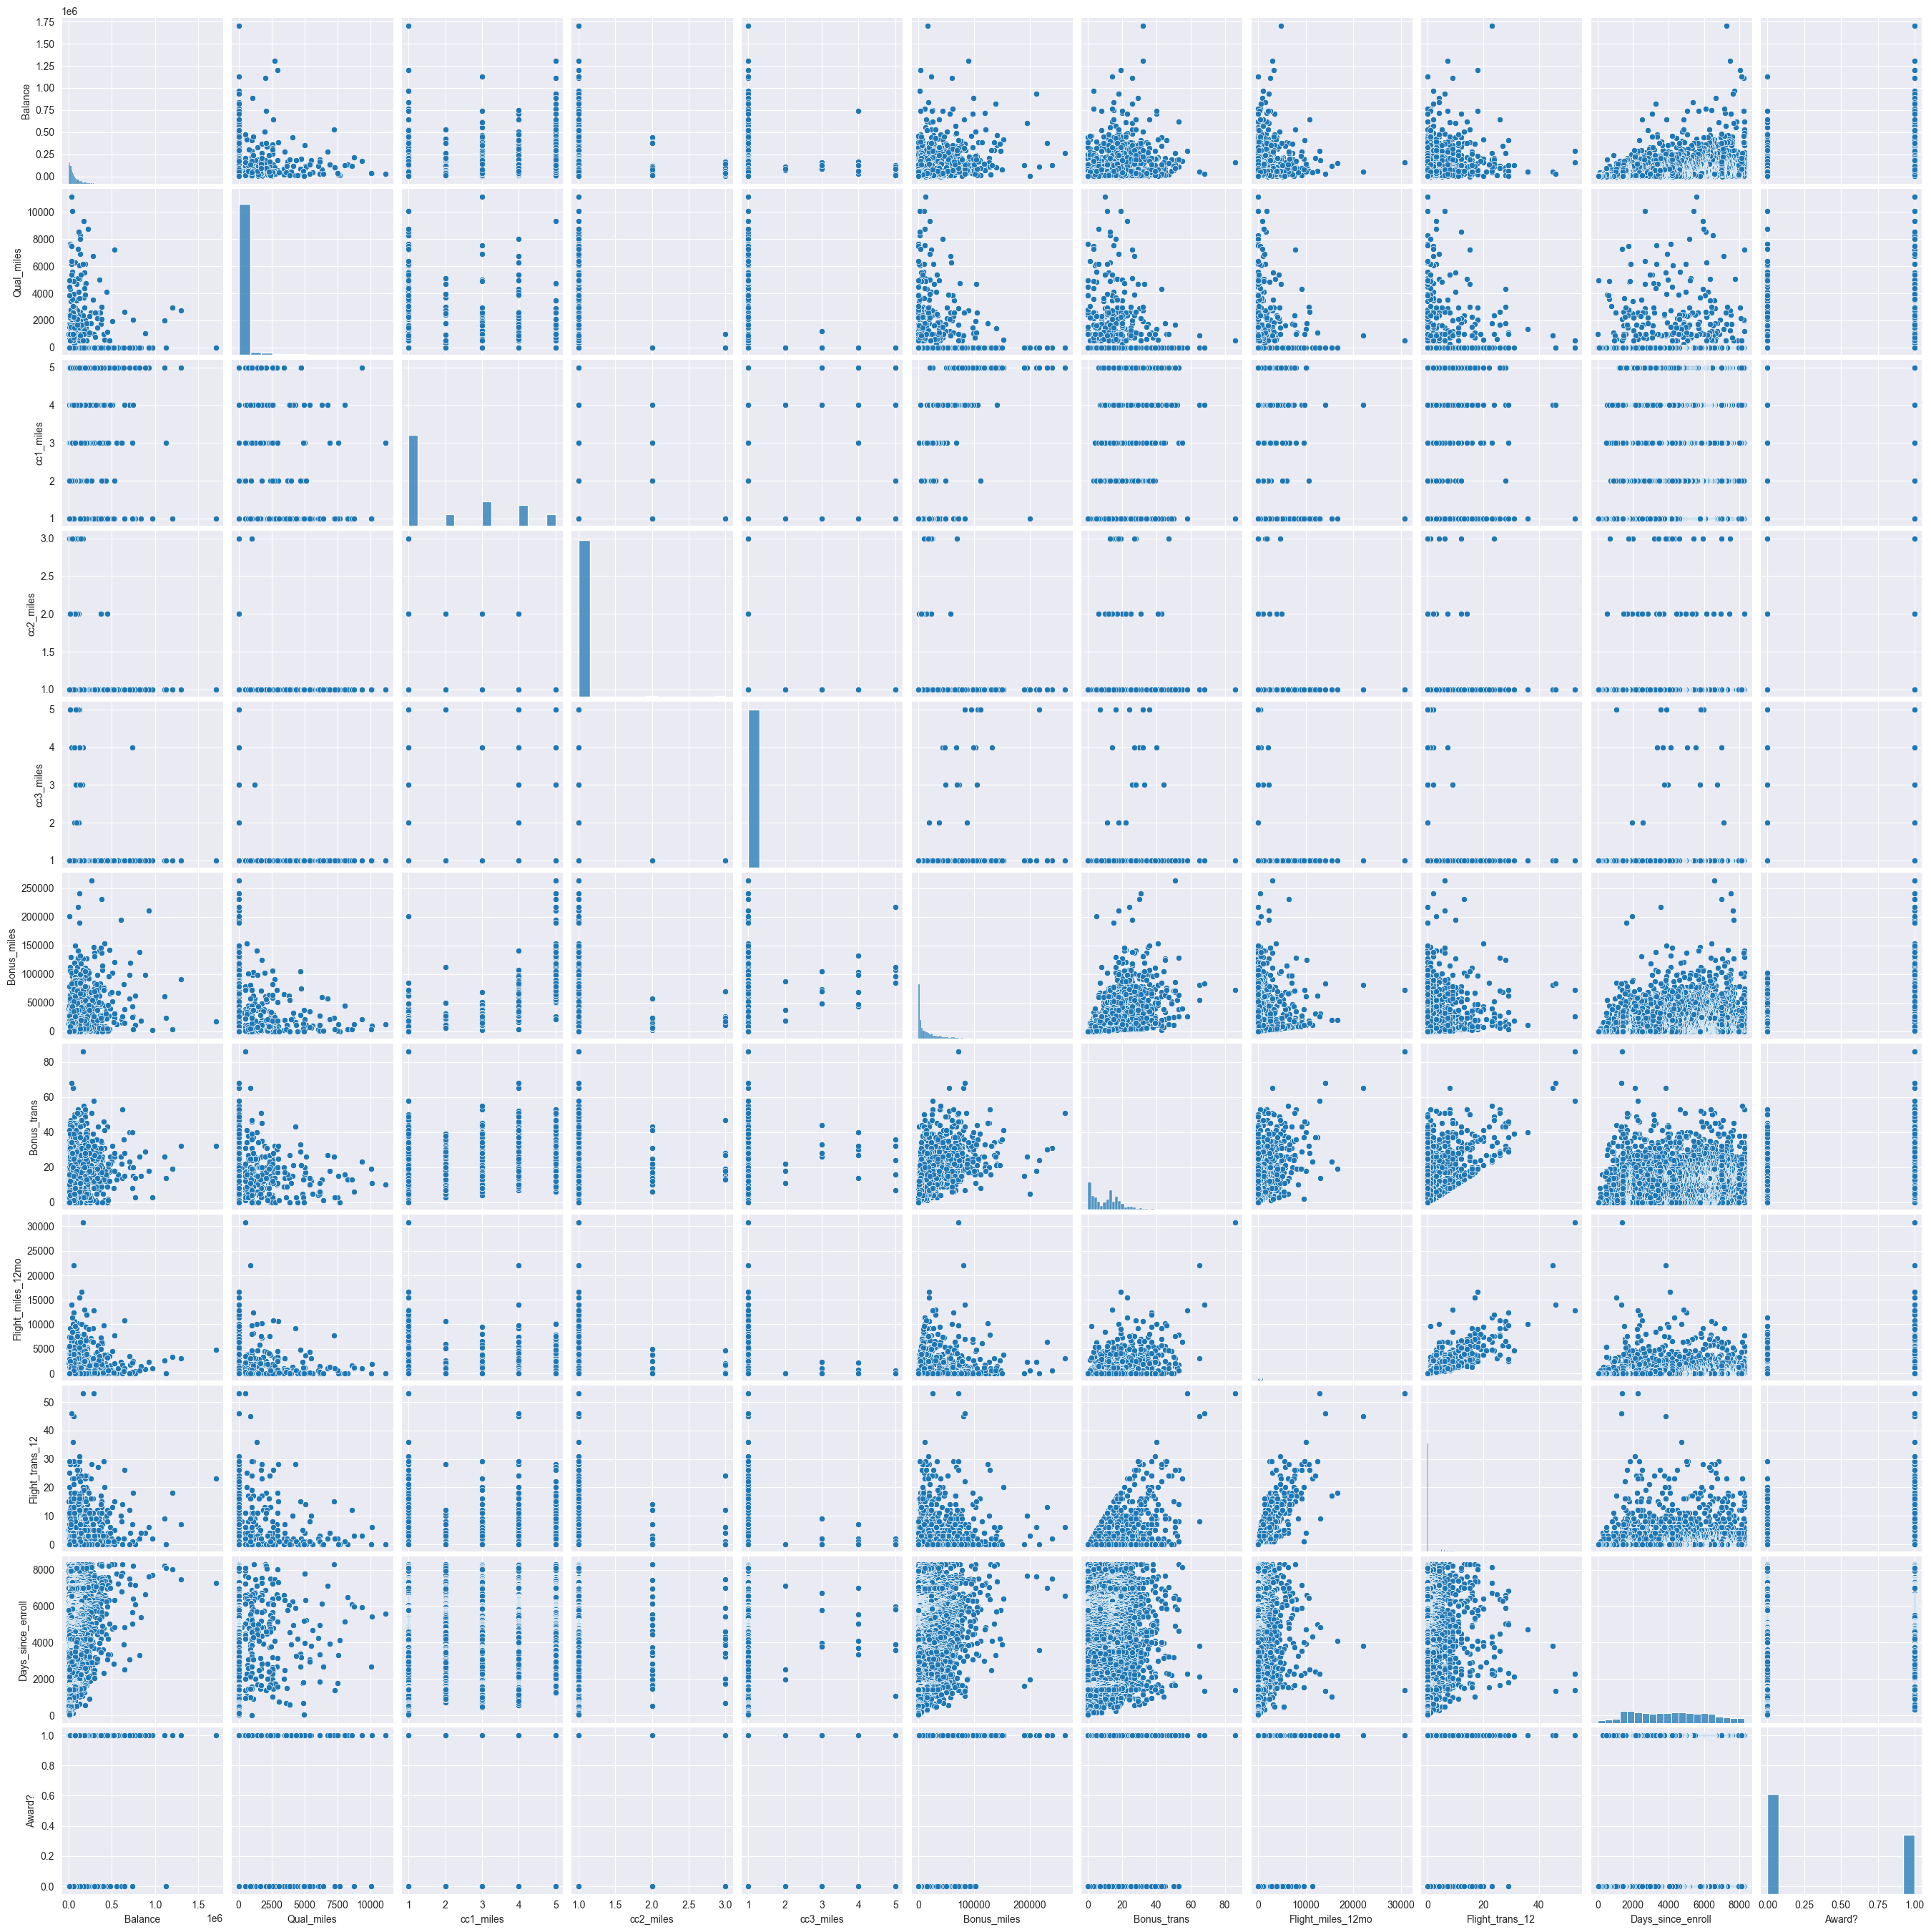

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(airline2)
plt.show()

In [7]:
# Normalize heterogenous numerical data

airline2_norm = pd.DataFrame(normalize(airline2), columns=airline2.columns)
airline2_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [ ]:
# creating Dendogram
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(airline2_norm, 'complete'))

In [ ]:
# creating cluster

hcluster = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean'  )
hcluster

In [ ]:
y = pd.DataFrame(hcluster.fit_predict(airline2_norm), columns=['clustersid'])
y['clustersid'].value_counts()

In [ ]:
# adding y to dataset

airline2['clustersid']= hcluster.labels_
airline2

In [ ]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

In [ ]:
# PLOTTING SCATTER PLOT

plt.scatter(airline2['clustersid'],airline2['Balance'], c=hcluster.labels_, cmap='viridis')
plt.show()

# K-Means Clustering

In [ ]:
# Normalize heterogenous numerical data by using Standard Scaler

airline2_norm= StandardScaler().fit_transform(airline2)
airline2_norm

In [ ]:
 # Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.


In [ ]:
# within-cluster sum-of-squares criterion 

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=2).fit(airline2_norm)
    wcss.append(kmeans.inertia_)

In [ ]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,11), wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Type Markdown and LaTeX:  𝛼2

## Build Cluster algorithm using K=4

In [ ]:
clusters4 = KMeans(n_clusters=4, random_state=30).fit(airline2_norm)
clusters4

In [ ]:
clusters4.labels_

In [ ]:
airline4= airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4.head()

In [ ]:
# Group data by Clusters

airline4.groupby('clusters4id').agg(['mean']).reset_index()

In [ ]:
clusters4.cluster_centers_

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(airline4['clusters4id'], airline4['Balance'], c=clusters4.labels_, cmap='viridis')
plt.show()

## Build cluster using K=5

In [ ]:
clusters5 = KMeans(n_clusters=5,random_state=30).fit(airline2_norm)
clusters5

In [ ]:
clusters5.labels_

In [ ]:
airline5 = airline2.copy()
airline5['clusters5id']= clusters5.labels_
airline5.head()

In [ ]:
clusters5.cluster_centers_

In [ ]:
airline5.groupby('clusters5id').agg(['mean']).reset_index()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(airline5['clusters5id'], airline5['Balance'], c=clusters5.labels_, cmap='viridis')
plt.show()

# DBSCAN Clustering

In [ ]:
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline2_norm)

In [ ]:
dbscan.labels_

In [ ]:
airline['clusters']= dbscan.labels_
airline.head()

In [ ]:
airline.groupby('clusters').agg(['mean']).reset_index()

In [ ]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(airline['clusters'],airline['Balance'],c=dbscan.labels_, cmap='viridis')